In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import cv2
from sklearn import cluster
from sklearn.datasets.samples_generator import make_blobs
from skimage import filters
from skimage.color import rgb2gray
from PIL import Image
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 150

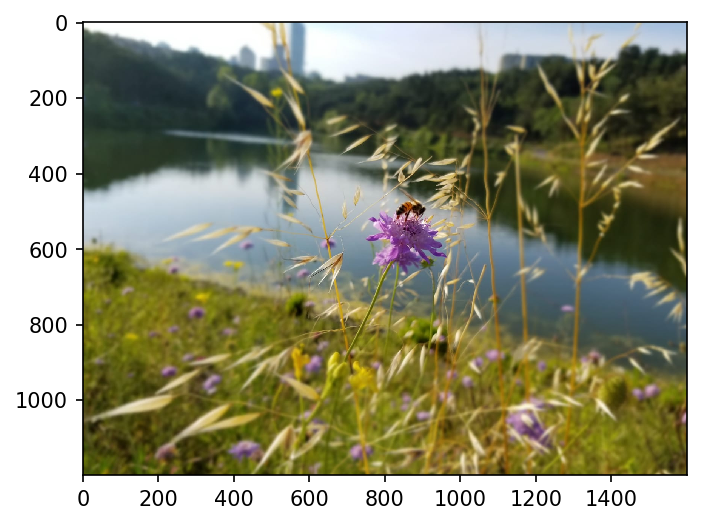

In [3]:
image = plt.imread('ITU_Golet_Ari.jpeg')
image.shape
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


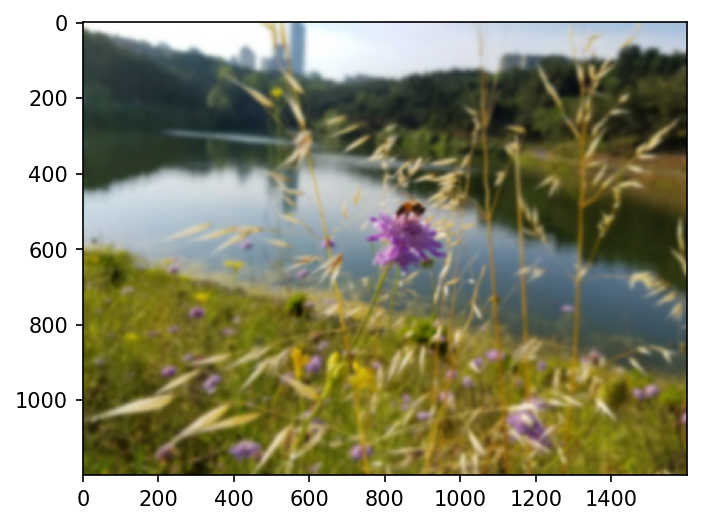

In [14]:
orginalBlurred = filters.gaussian(image, sigma=4.0)
plt.imshow(orginalBlurred)

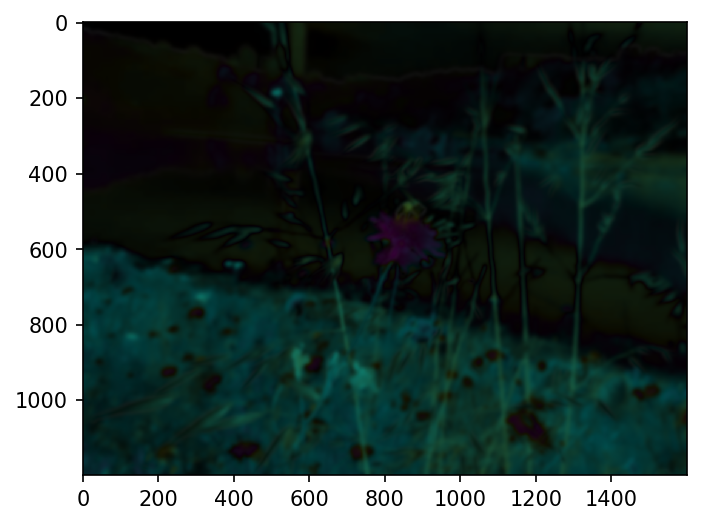

In [15]:
sobel = filters.sobel(orginalBlurred)
plt.imshow(sobel)

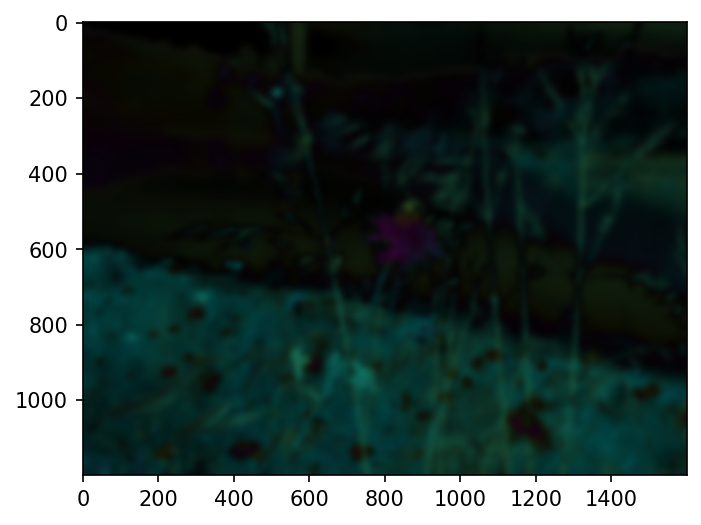

In [16]:
blurred = filters.gaussian(sobel, sigma=7.0)
plt.imshow(blurred)

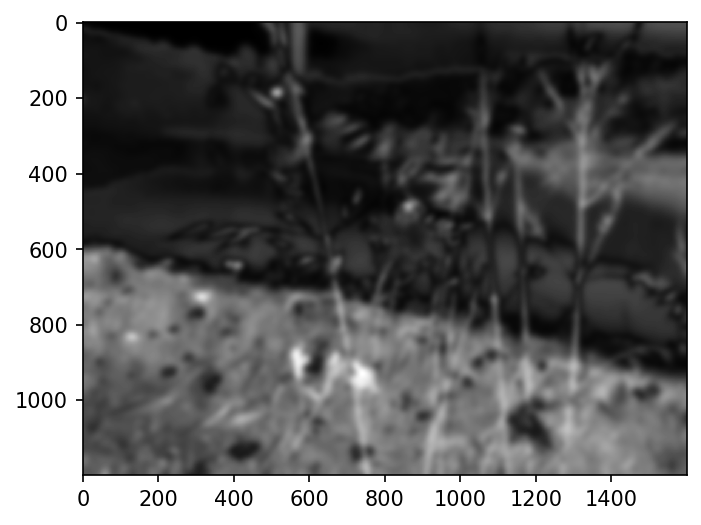

In [17]:
gray = rgb2gray(blurred)
plt.imshow(gray, cmap='gray')

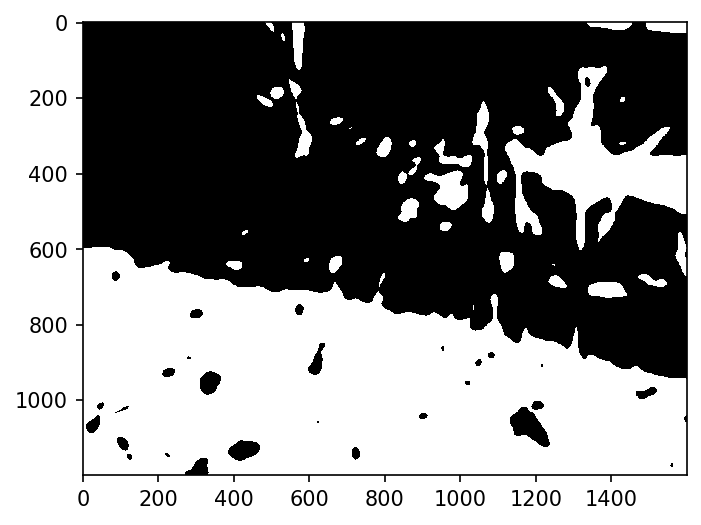

In [77]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
meanValue = gray_r.mean()
for i in range(gray_r.shape[0]):
    if gray_r[i] > meanValue:
        gray_r[i] = 255
    else:
        gray_r[i] = 0
mask = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(mask, cmap='gray')

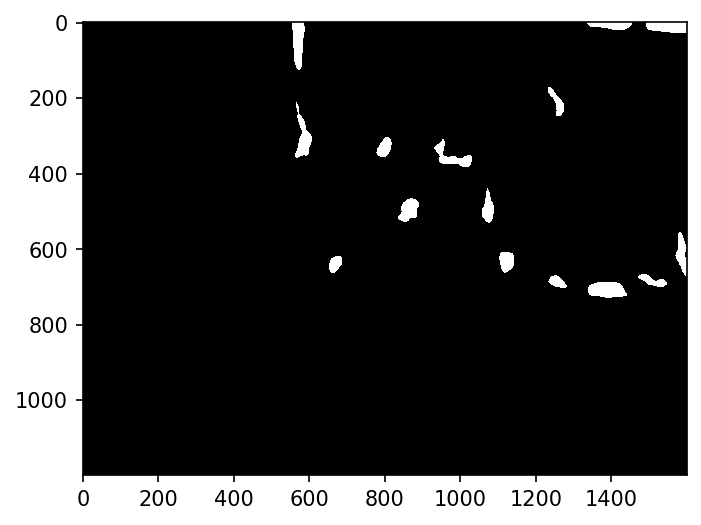

In [103]:
def removeBiggestComponents(mask,limit):
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(mask.astype(np.uint8), 8)
    sizes = stats[:, -1] # Taking only the last column which is the area of the component
    finalMask = np.zeros(output.shape)
    for i in range(0, nb_components):
        if sizes[i] <= limit:
            finalMask[output == i] = 255
    return finalMask
def removeSmallComponents(mask, limit):
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(mask.astype(np.uint8), 8)
    sizes = stats[:, -1] # Taking only the last column which is the area of the component
    finalMask = np.zeros(output.shape)
    for i in range(1, nb_components):
        if sizes[i] >= limit:
            finalMask[output == i] = 255
    return finalMask
smallCompsMask=removeSmallComponents(mask,1000)
bigCompMask=removeBiggestComponents(mask,4000)
finalMask = cv2.multiply(smallCompsMask, bigCompMask)
plt.imshow(finalMask, cmap='gray')



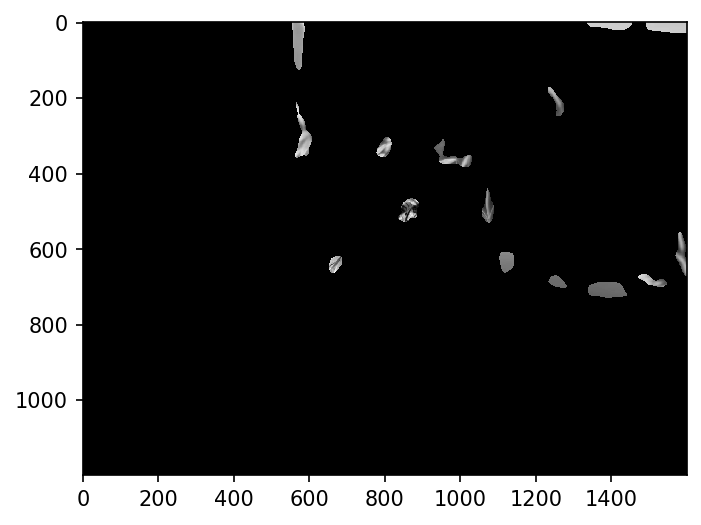

In [104]:
grayScale=rgb2gray(image)
bgRemoved = cv2.multiply(grayScale, finalMask)
plt.imshow(bgRemoved, cmap='gray')

(0, 0, 1600, 1200)
(554, 0, 587, 127)
(1335, 0, 1455, 21)
(1491, 0, 1600, 29)
(1231, 172, 1275, 250)
(561, 211, 607, 359)
(777, 304, 818, 358)
(931, 311, 1031, 385)
(1056, 440, 1088, 533)
(834, 467, 891, 530)
(1569, 556, 1600, 675)
(1103, 609, 1143, 664)
(651, 619, 687, 665)
(1470, 667, 1547, 703)
(1233, 671, 1281, 705)
(1337, 688, 1442, 730)


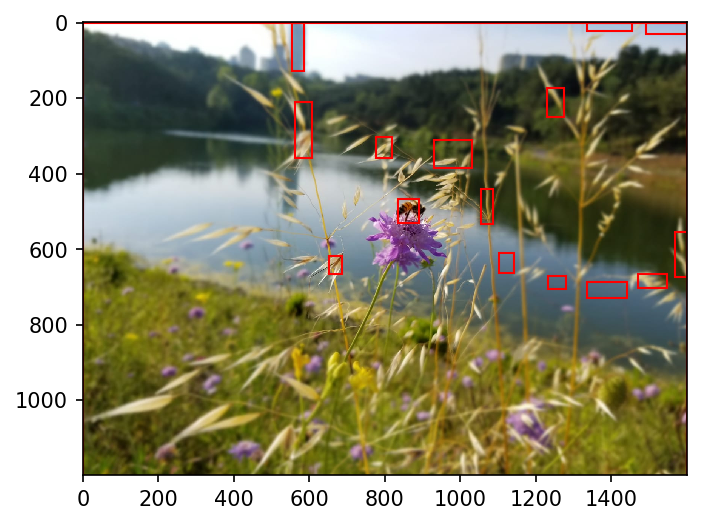

In [119]:
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(finalMask.astype(np.uint8), 8)
fig,ax = plt.subplots(1)
ax.imshow(image)
for i in range(0, nb_components):
    rect = patches.Rectangle((stats[i,0],stats[i,1]),stats[i,2],stats[i,3],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    imageFile = Image.open('ITU_Golet_Ari.jpeg')
    component = imageFile.crop((stats[i,0], stats[i,1], stats[i,0] + stats[i,2], stats[i,1] + stats[i,3]))
    component.save('results/component%d.jpg' % i, quality=95)
    print((stats[i,0], stats[i,1], stats[i,0] + stats[i,2], stats[i,1] + stats[i,3]))
